In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [3]:
class DifferentialEquationSolution:
    def __init__(self, equation, solving_function, h = 0.01, title = "Untitled solution", updatable = True):
        self.equation = equation
        self.solving_function = solving_function
        self.title = title
        self.updatable = updatable
        
        self.update(h)
  
    def __repr__(self):
        return f"<{self.title} of {self.equation}>"
    
    def __str__(self):
        return self.title + "\nt: " + str(self.t_list) + "\nx: " + str(self.x_list)
    
    def update(self, h):
        self.h = h
        self.t_list = np.arange(self.equation.t0, self.equation.t_max + h, h)
        self.x_list = self.solving_function(self.t_list, self.equation.f, self.equation.x0)
        
    def update_plot(self):
        self.plot_line.set_data(self.t_list, self.x_list)

In [4]:
class DifferentialEquation:
    def __init__(self, f, x0, t0 = 0, t_max = 1):
        self.f = f
        self.x0 = x0
        self.t0 = t0
        self.t_max = t_max
        self.solutions = []
        
    def add_solution(self, solving_function, h = 0.01, title = "Untitled solution", updatable = True):
        solution = DifferentialEquationSolution(self, solving_function, h, title, updatable)
        self.solutions.append(solution)
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        for solution in self.solutions:
            plot_line, = ax.plot(solution.t_list, solution.x_list, label = solution.title)
            solution.plot_line = plot_line
        
        ax.legend()
        
    def plot_interactive(self, h_min = 0.01, h_max = 1, h_step = 0.01):
        self.plot()
        
        def update(h):
            for solution in self.solutions:
                if solution.updatable:
                    solution.update(h)
                    solution.update_plot()
        
        interact(update, h=(0.01, 2, 0.01));
        

In [5]:
def euler(t_list, f, x0):
    result = []
    result.append(x0)
    h = t_list[1] - t_list[0]
    
    for t in t_list[:-1]:
        x_old = result[-1]
        x_new = x_old + h * f(t, x_old)
        result.append(x_new)
    
    return result

def enhanced_euler(t_list, f, x0):
    result = []
    result.append(x0)
    h = t_list[1] - t_list[0]
    
    for t in t_list[:-1]:
        x_old = result[-1]
        k1 = h * f(t, x_old)
        k2 = h * f(t + h, x_old + k1)
        
        x_new = x_old + 0.5*(k1 + k2)
        result.append(x_new)
    
    return result

def modified_euler(t_list, f, x0):
    result = []
    result.append(x0)
    h = t_list[1] - t_list[0]
    
    for t in t_list[:-1]:
        x_old = result[-1]
        k1 = h * f(t, x_old)
        k2 = h * f(t + h/2, x_old + k1/2)
        
        x_new = x_old + k2
        result.append(x_new)
    
    return result

<IPython.core.display.Javascript object>


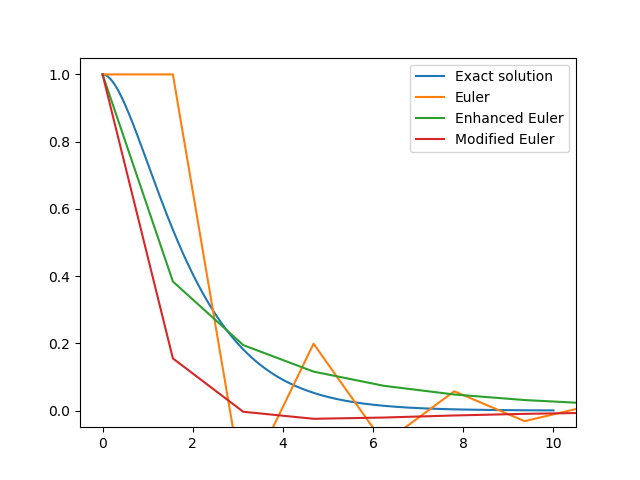

interactive(children=(FloatSlider(value=1.0, description='h', max=2.0, min=0.01, step=0.01), Output()), _dom_c…

In [9]:
def sample_f(t, x):
    return -x + np.exp(-t)

def sample_exact(t, f, x0):
    return np.exp(-t) + t * np.exp(-t)

eq = DifferentialEquation(sample_f, x0 = 1, t_max = 10)
eq.add_solution(sample_exact, title = "Exact solution", updatable = False)
eq.add_solution(euler, title = "Euler")
eq.add_solution(enhanced_euler, title = "Enhanced Euler")
eq.add_solution(modified_euler, title = "Modified Euler")

eq.plot_interactive()

In [13]:
eq = DifferentialEquation(sample_f, x0 = 1, t_max = 1)
eq.add_solution(sample_exact, title = "Exact solution", updatable = False)
eq.add_solution(euler, title = "Euler", h = 0.000001)